In [1]:
import csv
import matplotlib.pyplot as plt
import os, re, cv2
import numpy as np
import pandas as pd

In [2]:
base_wp = pd.read_csv('../../third/topics/bagfile-_base_waypoints.csv')
final_wp = pd.read_csv('../../third/topics/bagfile-_final_waypoints.csv')

In [3]:
base_waypoints = dict()
for idx, item in base_wp.iteritems():
    if "position" in idx:
        waypoint_idx = idx.split(".")[1]
        result = re.search("\d+", waypoint_idx)
        idx_key = int(result.group())
        if idx_key not in base_waypoints:
            base_waypoints[idx_key] = dict()
        base_waypoints[idx_key][idx[-1]] = item.values[0]

In [4]:
final_waypoints = dict()
for _, row in final_wp.iterrows():
    for idx, item in row.iteritems():
        if "position" in idx:
            waypoint_idx = idx.split(".")[1]
            result = re.search("\d+", waypoint_idx)
            idx_key = int(result.group())
            if idx_key not in final_waypoints:
                final_waypoints[idx_key] = dict()
            if idx[-1] not in final_waypoints[idx_key]:
                final_waypoints[idx_key][idx[-1]] = list()
            if item not in final_waypoints[idx_key][idx[-1]]:
                final_waypoints[idx_key][idx[-1]].append(item)

In [5]:
xs = []
ys = []
for idx, wp in base_waypoints.iteritems():
    xs.append(wp['x'])
    ys.append(wp['y'])

In [6]:
final_xs = []
final_ys = []
for idx, wp in base_waypoints.iteritems():
    final_xs.append(wp['x'])
    final_ys.append(wp['y'])

In [7]:
current_pose = pd.read_csv('../../third/topics/bagfile-_current_pose.csv')
current_pose.head()

,%time,field.header.seq,field.header.stamp,field.header.frame_id,field.pose.position.x,field.pose.position.y,field.pose.position.z,field.pose.orientation.x,field.pose.orientation.y,field.pose.orientation.z,field.pose.orientation.w
0,1510087289301998567,9095,1510087289287700000,/map,-5.510109,13.736713,-0.044699,-0.040334,0.059029,0.134609,0.988316
1,1510087289404981821,9096,1510087289392550000,/map,-5.501273,13.740076,-0.049398,-0.040395,0.058906,0.134691,0.988310
2,1510087289509424256,9097,1510087289497379000,/map,-5.502108,13.735029,-0.052792,-0.040085,0.058675,0.134303,0.988389
3,1510087289615228172,9098,1510087289602230000,/map,-5.504301,13.717782,-0.053165,-0.039944,0.058187,0.134807,0.988355
4,1510087289716519572,9099,1510087289707079000,/map,-5.499075,13.727512,-0.051684,-0.040176,0.058735,0.134820,0.988312


In [8]:
current_xs = list()
current_ys = list()
for row_idx, row in current_pose.iterrows():
    for col_idx, item in row.iteritems():
        if "position" in col_idx:
            axis = col_idx.split(".")[-1]
            if axis == 'x':
                current_xs.append(item)
            if axis == 'y':
                current_ys.append(item)

In [9]:
dbw_disabled_x, dbw_disabled_y = [11.4271707535, 24.612859726, -1.64931535721, 24.612859726], [19.2077579498, 6.67189359665, 1.00634908676, 6.67189359665]
dbw_enabled_x, dbw_enabled_y = [-5.48328542709, 25.0346069336, -6.22795438766], [13.7435131073, 2.02203655243, 14.5692100525]

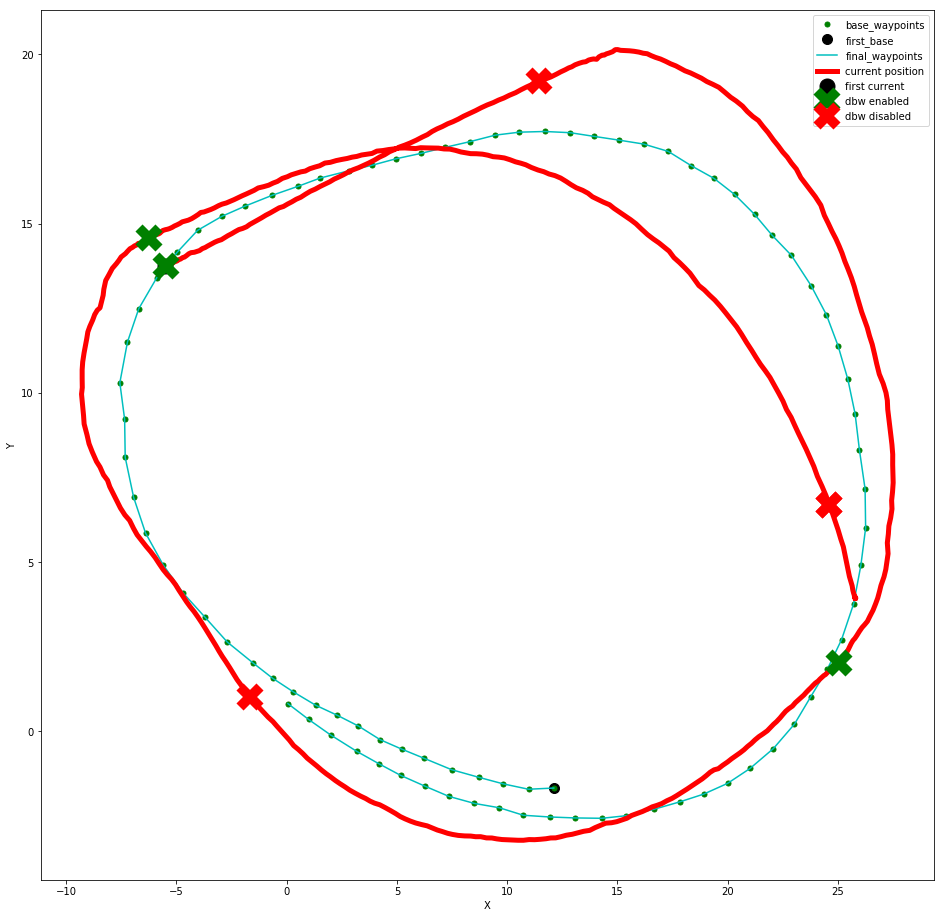

In [10]:
plt.rcParams["figure.figsize"] = [16, 16]
p1 = plt.plot([xs[0]], [ys[0]], 'ko', ms=10.0)
p2 = plt.plot(xs, ys, 'go', ms=5.)
p4 = plt.plot(final_xs, final_ys, 'c', ms=5.0)
p5 = plt.plot(current_xs, current_ys, 'r', lw=5.0)
p3 = plt.plot([current_xs[0]], [current_ys[0]], 'ko', ms=15.0)
p6 = plt.plot(dbw_enabled_x, dbw_enabled_y, 'gx', ms=20.0, mew=10.0)
p7 = plt.plot(dbw_disabled_x, dbw_disabled_y, 'rx', ms=20.0, mew=10.0)
plt.xlabel("X", fontsize=10)
plt.ylabel("Y", fontsize=10)
plt.legend((p2[0], p1[0], p4[0], p5[0], p3[0], p6[0], p7[0]), ('base_waypoints', 'first_base', 'final_waypoints', 'current position', 'first current', 'dbw enabled', 'dbw disabled'), loc=0)
plt.savefig("../imgs/third_waypoints.png")
plt.show()

In [14]:
church_xs = list()
church_ys = list()
church_zs = list()
church_yaws = list()
with open('./churchlot_with_cars.csv') as f:
    for line in f:
        columns = line.split(',')
        church_xs.append(columns[0])
        church_ys.append(columns[1])
        church_zs.append(columns[2])
        church_yaws.append(columns[3])

In [12]:
yaw_xs = list()
yaw_ys = list()

with open('./wp_yaw_const.csv') as f:
    for line in f:
        columns = line.split(',')
        yaw_xs.append(columns[0])
        yaw_ys.append(columns[1])

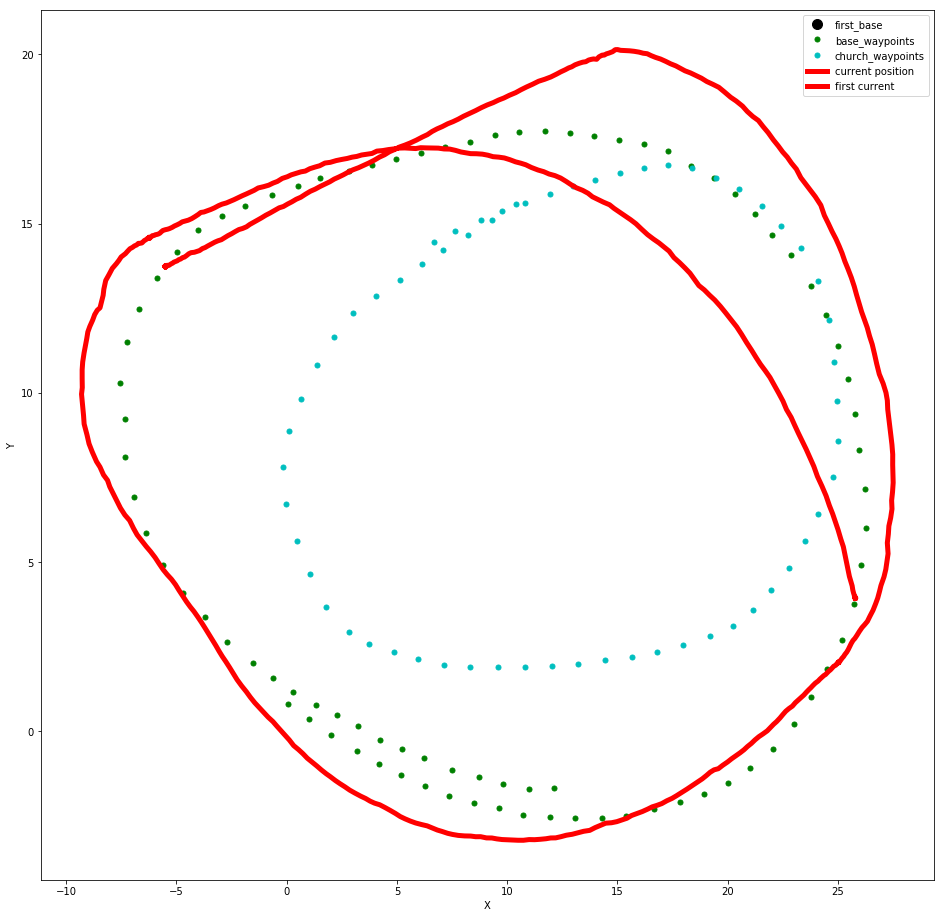

In [13]:
plt.rcParams["figure.figsize"] = [16, 16]
# p1 = plt.plot([xs[0]], [ys[0]], 'ko', ms=10.0)
p2 = plt.plot(final_xs, final_ys, 'go', ms=5.0)
p3 = plt.plot(church_xs, church_ys, 'co', ms=5.0)
p4 = plt.plot(current_xs, current_ys, 'r', lw=5.0)
# p5 = plt.plot([current_xs[0]], [current_ys[0]], 'ro', ms=15.0)
# p6 = plt.plot(yaw_xs, yaw_ys, 'bo')
# p7 = plt.plot(dbw_disabled_x, dbw_disabled_y, 'rx', ms=20.0, mew=10.0)
plt.xlabel("X", fontsize=10)
plt.ylabel("Y", fontsize=10)
plt.legend((p1[0], p2[0], p3[0], p4[0], p5[0]), ('first_base', 'base_waypoints', 'church_waypoints', 'current position', 'first current'), loc=0)
plt.savefig("../imgs/all_waypoints.png")
plt.show()